In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../octave/ex1data2.txt", sep=",", header=None, names = ['Size - sq ft', 'no of bed rooms', 'price'])
df

,Size - sq ft,no of bed rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


# Feature Scaling
The no of bedrooms is a one digit number, whereas size is in 1000s.

Also, need to save the mean, std for applying normalization to new examples, in order to predict price.

In [3]:
print("No of rows:",len(df.index))
print("No fo cols:",len(df.columns))
print("Also no of rows:",len(df))
print("Shape:",df.shape)
df.index


No of rows: 47
No fo cols: 3
Also no of rows: 47
Shape: (47, 3)


RangeIndex(start=0, stop=47, step=1)

In [4]:
def normalize_features(df):
    mean = [0 for i in range(len(df.columns)-1)]
    std = [0 for i in range(len(df.columns)-1)]
    X_normalized = df.copy()
    
    for i in range(len(X_normalized.columns)-1): # removing the target variabe, since we only need to normalize features
#         print(df.iloc[:, i]) 
        mean[i] = np.mean(X_normalized.iloc[:, i])
        std[i] = np.std(X_normalized.iloc[:, i]) 
        
        X_normalized.iloc[:, i] = (X_normalized.iloc[:, i] - mean[i]) / std[i]
    
    return X_normalized, mean, std

In [5]:
X_normalized, mean, std = normalize_features(df)
#print(mean, std, X_normalized)
print(type(X_normalized))
print(type(mean), type(std))

<class 'pandas.core.frame.DataFrame'>
<class 'list'> <class 'list'>


In [6]:
# features normalized
X_normalized

,Size - sq ft,no of bed rooms,price
0,0.131415,-0.226093,399900
1,-0.509641,-0.226093,329900
2,0.507909,-0.226093,369000
3,-0.743677,-1.554392,232000
4,1.271071,1.102205,539900
5,-0.019945,1.102205,299900
6,-0.593589,-0.226093,314900
7,-0.729686,-0.226093,198999
8,-0.789467,-0.226093,212000
9,-0.644466,-0.226093,242500


# Adding ones as our feature x0 for the intercept term

In [7]:
## run only once
X_normalized.insert(0, 'feature-x0', pd.Series(1, index = range(len(X_normalized))))
X_normalized

,feature-x0,Size - sq ft,no of bed rooms,price
0,1,0.131415,-0.226093,399900
1,1,-0.509641,-0.226093,329900
2,1,0.507909,-0.226093,369000
3,1,-0.743677,-1.554392,232000
4,1,1.271071,1.102205,539900
5,1,-0.019945,1.102205,299900
6,1,-0.593589,-0.226093,314900
7,1,-0.729686,-0.226093,198999
8,1,-0.789467,-0.226093,212000
9,1,-0.644466,-0.226093,242500


In [8]:
def compute_cost(X, theta):
    costdf = X.copy()
    costdf = costdf.drop("price", axis = 1)
    for i in range(len(X.columns)-1):
        costdf.iloc[:, i] = theta[i] * costdf.iloc[:, i]
    
    hypothesis = costdf.sum(axis=1) 
    #print(hypothesis)
    sqaured_error = (hypothesis - X['price']) ** 2
    
    mean_squared_error = sum(sqaured_error) / (2 * len(X))
    
    return mean_squared_error

In [9]:
# we have already added ones in the Dataframe, so -1 for just for not considering price 
theta = [0 for i in range(len(X_normalized.columns)-1)] 
theta

[0, 0, 0]

In [10]:
# cost when: thetas = 0 0 0 

cost = compute_cost(X_normalized, theta)
print(type(cost))
print(cost)

<class 'float'>
65591548106.45744


In [11]:
def gradient_descent_multi(X, theta, alpha, num_of_iterations):
    m = len(X)
    newDf = X.copy() # used for hypothesis summation
    newDf = newDf.drop("price", axis = 1)
#     print(newDf)
    print(type(newDf.iloc[:, 0]))
    J_history = []
    temp_theta = [0 for item in theta]
    
    for iter1 in range(num_of_iterations):
        
        for i in range(len(newDf.columns)): # in range(x), x is excluded
            newDf.iloc[:, i] = theta[i] * X.iloc[:, i]
        
        print("NewDFFFFF", newDf.iloc[:, 1])
        print("New Df close")
        hypothesis = newDf.sum(axis=1) 
#         print(hypothesis)
        
        error = hypothesis - X['price']
        print(type(error))
        print("This is the error")
        print(error)
        
        for i in range(len(theta)): 
#             print("error\n", error)
#             print(":!!!!!!!!")
            feature_error = error * X.iloc[:, i]
#             print("Column\n",newDf.iloc[:, i])
#             print("Column close")
#             print("feature error\n",feature_error)
#             print("Feature Error close")
#             print("Lens",len(error), len(newDf.iloc[:, i]))
            derivative = sum(feature_error) / m
#             print(derivative)
            temp_theta[i] = theta[i] - alpha * derivative 
        
        theta = temp_theta[:]
        cost = compute_cost(X, theta)
        J_history.append(cost)
        print("Cost:",J_history[iter1])
        print("theta:",theta)
        print("temp_theta", temp_theta)
    
    
 
    return J_history, theta;

In [12]:
alpha = 0.1
num_of_iterations = 50
J_history, theta = gradient_descent_multi(X_normalized, theta, alpha, num_of_iterations)

<class 'pandas.core.series.Series'>
NewDFFFFF 0     0.0
1    -0.0
2     0.0
3    -0.0
4     0.0
5    -0.0
6    -0.0
7    -0.0
8    -0.0
9    -0.0
10   -0.0
11   -0.0
12   -0.0
13    0.0
14   -0.0
15    0.0
16   -0.0
17   -0.0
18    0.0
19    0.0
20   -0.0
21   -0.0
22   -0.0
23   -0.0
24    0.0
25   -0.0
26   -0.0
27    0.0
28    0.0
29    0.0
30   -0.0
31   -0.0
32    0.0
33    0.0
34   -0.0
35   -0.0
36   -0.0
37    0.0
38    0.0
39    0.0
40   -0.0
41    0.0
42    0.0
43   -0.0
44   -0.0
45   -0.0
46   -0.0
Name: Size - sq ft, dtype: float64
New Df close
<class 'pandas.core.series.Series'>
This is the error
0    -399900.0
1    -329900.0
2    -369000.0
3    -232000.0
4    -539900.0
5    -299900.0
6    -314900.0
7    -198999.0
8    -212000.0
9    -242500.0
10   -239999.0
11   -347000.0
12   -329999.0
13   -699900.0
14   -259900.0
15   -449900.0
16   -299900.0
17   -199900.0
18   -499998.0
19   -599000.0
20   -252900.0
21   -255000.0
22   -242900.0
23   -259900.0
24   -573900.0
25   -2

theta: [244270.06991858664, 68920.84233677997, 20508.08171916906]
temp_theta [244270.06991858664, 68920.84233677997, 20508.08171916906]
NewDFFFFF 0       9057.261582
1     -35124.866167
2      35005.495339
3     -51254.849313
4      87603.266468
5      -1374.629692
6     -40910.620991
7     -50290.556843
8     -54410.715581
9     -44417.139067
10     -5319.462527
11       -59.685414
12     -9702.610121
13    217169.109351
14    -64228.966192
15     26239.200151
16    -59670.492694
17    -67034.180652
18     53327.052282
19     90320.817977
20    -20485.153203
21     -9877.936025
22    -34774.214360
23     -3390.877586
24    165623.293644
25    -78956.342108
26    -47573.005334
27     46051.027276
28     17472.904962
29     55781.614935
30    -14173.420667
31    -87722.637297
32      3446.832661
33     99613.090876
34    -16627.983320
35    -49413.927324
36    -66771.191797
37     11511.824234
38    194113.753006
39     14141.712791
40    -29514.437247
41     20804.097134
42     49645.2

dtype: float64
Cost: 4401776301.436805
theta: [277333.5065012443, 77800.09682457073, 18249.216732034696]
temp_theta [277333.5065012443, 77800.09682457073, 18249.216732034696]
NewDFFFFF 0      10224.132557
1     -39650.095618
2      39515.345931
3     -57858.147175
4      98889.427092
5      -1551.726873
6     -46181.244546
7     -56769.622353
8     -61420.592044
9     -50139.516624
10     -6004.782960
11       -67.374844
12    -10952.623057
13    245147.580354
14    -72503.753861
15     29619.665737
16    -67358.000160
17    -75670.371523
18     60197.317535
19    101957.087952
20    -23124.309695
21    -11150.536661
22    -39254.268411
23     -3827.733317
24    186960.980815
25    -89128.496586
26    -53701.961493
27     51983.902974
28     19723.985543
29     62968.107989
30    -15999.419956
31    -99024.176780
32      3890.897234
33    112446.508957
34    -18770.210410
35    -55780.054334
36    -75373.501117
37     12994.923012
38    219121.941445
39     15963.627070
40    -33316.86

Name: Size - sq ft, dtype: float64
New Df close
<class 'pandas.core.series.Series'>
This is the error
0     -67273.027924
1     -56600.832823
2      -1529.713936
3       7112.128111
4     -89273.693049
5      31246.699863
6     -49369.950131
7      53935.662718
8      35402.109483
9      18321.493924
10     85850.574425
11    -26615.273380
12    -22562.802227
13    -62764.869184
14    -25681.847161
15    -81673.422075
16    -72088.406155
17     30551.308083
18    -95397.827405
19   -144724.562192
20     40057.388245
21     39673.088255
22     30870.022771
23     68539.280195
24    -31036.005009
25    -35457.782127
26   -207916.206426
27    -86697.762711
28   -131072.493658
29     95468.480034
30    -60994.892777
31      7715.464569
32     22720.964286
33   -125674.570661
34     24764.481505
35      4211.801704
36       904.449779
37      3450.642958
38     44648.693760
39     64982.059917
40   -100194.825034
41     18500.634489
42     85656.188853
43    -72786.392267
44     -7178.51070

NewDFFFFF 0      12631.286247
1     -48985.251771
2      48818.776829
3     -71480.178350
4     122171.798280
5      -1917.063007
6     -57054.084131
7     -70135.372956
8     -75881.359637
9     -61944.285561
10     -7418.539616
11       -83.237471
12    -13531.291404
13    302864.741119
14    -89573.923641
15     36593.273254
16    -83216.661782
17    -93486.084785
18     74370.079301
19    125961.704388
20    -28568.660801
21    -13775.801475
22    -48496.231628
23     -4728.928830
24    230978.780098
25   -110112.769647
26    -66345.466848
27     64222.911334
28     24367.769679
29     77793.220302
30    -19766.298227
31   -122338.273222
32      4806.963959
33    138920.738178
34    -23189.439228
35    -68912.822599
36    -93119.319678
37     16054.427248
38    270711.666717
39     19722.078320
40    -41160.929483
41     29013.461038
42     69235.367800
43    -97887.266072
44   -140432.018513
45    -18176.982762
46    -97520.500965
Name: Size - sq ft, dtype: float64
New Df close
<c

NewDFFFFF 0      13461.143297
1     -52203.511236
2      52026.099134
3     -76176.321622
4     130198.306911
5      -2043.011246
6     -60802.454092
7     -74743.164479
8     -80866.654088
9     -66013.934610
10     -7905.926829
11       -88.706051
12    -14420.277477
13    322762.512070
14    -95458.799540
15     38997.397837
16    -88683.874866
17    -99627.983955
18     79256.084843
19    134237.204313
20    -30445.580072
21    -14680.851503
22    -51682.363185
23     -5039.612544
24    246153.748448
25   -117347.017718
26    -70704.267077
27     68442.262767
28     25968.696541
29     82904.121206
30    -21064.915138
31   -130375.719014
32      5122.774467
33    148047.627687
34    -24712.951501
35    -73440.294349
36    -99237.122916
37     17109.179660
38    288497.027661
39     21017.790049
40    -43865.142407
41     30919.603034
42     73784.030298
43   -104318.316421
44   -149658.196932
45    -19371.183970
46   -103927.455383
Name: Size - sq ft, dtype: float64
New Df close
<c

In [13]:
print("final theta values :", theta)

final theta values : [338658.2492492952, 103322.82942954129, -474.7424952152347]


Cost function history


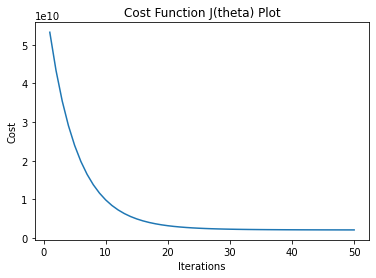

In [14]:
def plot_cost_function(J_history):
#     print(J_history)
    x = np.linspace(1, len(J_history), len(J_history))
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Function J(theta) Plot")
    
    plt.plot(x, J_history) 
    print("Cost function history")
#     for cost in J_history:
#         print(cost)

plot_cost_function(J_history)

In [15]:
#Price Prediction for area = 1650 sq ft and 3 bedrooms

area = (1650 - mean[0]) / std[0]
bedrooms = (3 - mean[1]) / std[1]

prediction = theta[0] * 1 + theta[1] * area + theta[2] * bedrooms
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): \n",prediction)


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 
 292679.0716800462


# Normal Equations method

In [33]:
def normalEquations_method(X, y):
    return (np.linalg.pinv( X.transpose().dot(X) )).dot( X.transpose()).dot(y)

    

In [42]:
X = df.drop("price", axis = 1)

X.insert(0, 'feature-x0', 1)
# print("X", X)

y = df['price']
# print(y)

m = len(X)

theta_via_normaleqn = normalEquations_method(X, y)

print(type(theta_via_normaleqn))

<class 'numpy.ndarray'>


In [44]:
#Price Prediction for area = 1650 sq ft and 3 bedrooms

area = 1650
bedrooms = 3

prediction = theta_via_normaleqn[0] * 1 + theta_via_normaleqn[1] * area + theta_via_normaleqn[2] * bedrooms

print("Predicted price of a 1650 sq-ft, 3 br house (using normal equation: \n",prediction)
# Predicted price of a 1650 sq-ft, 3 br house (using normal equation: 
#  293081.4643349892
# Exact same answer as from octave.

Predicted price of a 1650 sq-ft, 3 br house (using normal equation: 
 293081.4643349892
